In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import PCA
from scipy.spatial import distance
from tqdm import tqdm



if not os.path.exists('data'):
    os.makedirs('data')

df = pd.read_csv('datasets/nba_final.csv')

## Choose the important stats

In [2]:
# Drop the columns that you don't want to include in your dataset
columns_to_exclude = ["Player", "Tm", "Pos"]
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Select only the columns you want in your DataFrame
stats = df[columns_to_include]

## PCA

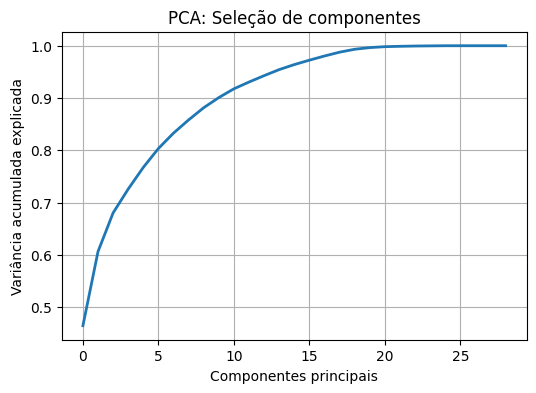

In [3]:
data = StandardScaler().fit_transform(stats)

pca = PCA()
pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Just a plot
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Componentes principais')
plt.ylabel('Variância acumulada explicada')
plt.title('PCA: Seleção de componentes')

plt.show()


## Hash Table with similarity players

In [4]:
# # Select columns to use in similarity calculation
# stats_columns = df.columns.difference(['Player', 'Tm', 'Pos','Salario_2022/2023', 'Age', 'Weight','Height' ])

# # Function to get stats from a player
# def getStats(player_name):
#     return df.loc[df['Player'] == player_name, stats_columns].values[0]

# # Cosine similarity
# def similarity(player1, player2):
#     return 1 - distance.cosine(getStats(player1), getStats(player2))

# def normalize_data(engine):
#     all_metrics = np.array(list(engine.values()))

#     min_val = np.min(all_metrics[all_metrics > 0])  # Exclua 0, que é a similaridade com o próprio jogador
#     max_val = np.max(all_metrics)
    
#     # Normalize min-max
#     for player in engine:
#         engine[player] = (engine[player] - min_val) / (max_val - min_val)
        
#     return engine

# # Function to calculate similarity vectors
# def calculate_similarity_vectors(player_names, stats_columns):
#     engine = {}
#     for query in tqdm(player_names):
#         query_stats = getStats(query)
#         metric = []
#         for player in player_names:
#             player_stats = getStats(player)
#             if query != player:  # Não calcular a similaridade de um jogador com ele mesmo
#                 value = 1 - distance.cosine(query_stats, player_stats)
#                 metric.append(value)
#             else:
#                 metric.append(0.0)  # Similaridade com o próprio jogador definida como 0
#         engine[query] = np.array(metric)
#     return engine

# # Load data
# player_names = df['Player'].tolist()
# engine = calculate_similarity_vectors(player_names, stats_columns)

# # Normalize data
# engine = normalize_data(engine)

# # Save hash table with pickle
# with open('data/engine.pickle', 'wb') as file:
#     pickle.dump(engine, file)


100%|██████████| 539/539 [01:47<00:00,  5.03it/s]


## Testing with 2 different players

In [5]:
# Load the engine
with open(r'data\engine.pickle', 'rb') as file:
    engine = pickle.load(file)

player_names = list(engine.keys())

aaron_holiday_index = player_names.index('Damian Lillard')

austin_rivers_similarity = engine['Stephen Curry']

# Just a little bit of testing
similarity_value = austin_rivers_similarity[aaron_holiday_index]

print(f"A similaridada é: {similarity_value}")


A similaridada é: 0.9974576236160478


## Input to get Recommendation

In [6]:
print("Welcome to Perfect Match NBA players!")
print("\nWhich team do you want to pick a player from?")

# Print teams available in dataset
teams = df['Tm'].unique()
print(teams)

# Input team name with validation
while True:
    team = input("Enter team name: ")
    if team in teams:
        break
    else:
        print("Team not found. Please enter a valid team name from the list above.")

print("\nWhich player do you want to pick from {}?".format(team))

# Show all players in the team
players_in_team = df.loc[df['Tm'] == team, 'Player']
print(players_in_team)

# Input player name with validation
while True:
    player = input("\nEnter player name: \n")
    if player in players_in_team.values:
        break
    else:
        print("Player not found in {}. Please enter a valid player name from the list above.".format(team))

print("\nYou chose " + player + " from the " + team + " team.")


Welcome to Perfect Match NBA players!

Which team do you want to pick a player from?
['TOR' 'MEM' 'MIA' 'UTA' 'MIL' 'CLE' 'NOP' 'MIN' 'ORL' 'NYK' 'WAS' 'PHO'
 'DET' 'GSW' 'CHO' 'SAS' 'SAC' 'LAC' 'OKC' 'DAL' 'LAL' 'IND' 'ATL' 'CHI'
 'DEN' 'BOS' 'POR' 'PHI' 'HOU' 'BRK']

Which player do you want to pick from MIA?
2            Bam Adebayo
52        Jamaree Bouyea
74          Jimmy Butler
76            Jamal Cain
114       Dewayne Dedmon
200        Udonis Haslem
207          Tyler Herro
209    Haywood Highsmith
258         Nikola Jović
299           Kyle Lowry
308         Caleb Martin
374       Victor Oladipo
414      Duncan Robinson
416     Orlando Robinson
450            Dru Smith
459            Max Strus
486         Gabe Vincent
536       Omer Yurtseven
537          Cody Zeller
Name: Player, dtype: object

You chose Tyler Herro from the MIA team.


## Pick the best similarity players from Ash Table

In [7]:
# Just to see the vector of the player
def print_player_vector(player_name):
    if player_name in engine:
        print(f"Vetor de características para {player_name}:")
        print(engine[player_name])
    else:
        print(f"Jogador '{player_name}' não encontrado.")

print_player_vector(player)

Vetor de características para Tyler Herro:
[ 0.83797573  0.97434007  0.99192462  0.89831233  0.84242415  0.7128889
  0.98123527  0.98865599  0.80746307  0.9685128   0.97125803  0.62873659
  0.76149944  0.99786957  0.81259039  0.94093605  0.99069385  0.74960791
  0.95833047  0.67923988  0.93104324  0.78720057  0.99620507  0.9980818
  0.74090177  0.70247257  0.98568125  0.99331451  0.99768353  0.71915207
  0.73944609  0.95966304  0.82291734  0.71014206  0.98255853  0.88613011
  0.81169112  0.68648991  0.97357082  0.93896958  0.69310979  0.70688825
  0.80711814  0.67753009  0.82071627  0.99766397  0.9245756   0.67603591
  0.97667871  0.74911359  0.68261177  0.71454359  0.49944692  0.67296256
  0.93827216  0.52507703  0.70769125  0.99523452  0.69604807  0.71618054
  0.99271715  0.90680226  0.69596108  0.9946975   0.645978    0.69076595
  0.55192627  0.94490073  0.99620186  0.91916063  0.96190106  0.81491619
  0.58060416  0.59687145  0.99117185  0.73597279  0.70881231  0.9824346
  0.6876948

In [8]:
df_ler = pd.read_csv('datasets/nba_final.csv')

# load hash table
with open(r'data\engine.pickle', 'rb') as file:
    engine = pickle.load(file)

def get_player_info(player_name):
    player_info = df.loc[df['Player'] == player_name, ['Pos', 'Tm']].iloc[0]
    return player_info['Pos'], player_info['Tm']

def top_five_similar_players(player_name):
    # if players doesn't exist in engine
    if player_name not in engine:
        print(f"Jogador '{player_name}' não encontrado.")
        return
    
    player_pos, player_team = get_player_info(player_name)

    # Position by position
    complementary_positions = {
        'PG': ['PG', 'SG'],
        'SG': ['SG', 'PG'],
        'SF': ['SF', 'PF'],
        'PF': ['PF', 'SF'],
        'C':  ['C']
    }
    
    similarity_vector = engine[player_name]

    all_players_info = df_ler.set_index('Player')

    if player_name in all_players_info.index:
        print("Estatísticas do Jogador Selecionado:")
        print(all_players_info.loc[[player_name]].to_string(), "\n")

    eligible_positions = complementary_positions.get(player_pos, [player_pos])
    eligible_players = all_players_info[(all_players_info['Pos'].isin(eligible_positions)) & (all_players_info['Tm'] != player_team)]

    player_names = list(engine.keys())  
    eligible_indices = [player_names.index(player) for player in eligible_players.index if player in player_names]

    # Just the eligible similarity values
    eligible_similarity = similarity_vector[eligible_indices]

    top_indices = np.argsort(eligible_similarity)[::-1][:5]

    top_players = [eligible_players.index[i] for i in top_indices]
    
    # Get info
    top_players_info = all_players_info.loc[top_players]
    top_players_info['Similaridade'] = eligible_similarity[top_indices]

    # Equals players
    print("Top 5 Jogadores Semelhantes:")
    print(top_players_info.to_string())
    return top_players_info

# Get top five similar players
top_players_info = top_five_similar_players(player)




Estatísticas do Jogador Selecionado:
            Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Salario_2022/2023  Weight  Height
Player                                                                                                                                                                                              
Tyler Herro  SG   23  MIA  67  67  34.9  7.3  16.6  0.439  3.0  8.0  0.378  4.2  8.5  0.497  0.531  2.5  2.7  0.934  0.4  5.0  5.4  4.2  0.8  0.2  2.4  1.5  20.1            5722116    88.0     6.5 

Top 5 Jogadores Semelhantes:
                Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Salario_2022/2023     Weight    Height  Similaridade
Player                                                                                                                  

## PCA 3D GRAPH

In [9]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('datasets/nba_final.csv')

num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

posicao_do_jogador = data[data['Player'] == player]['Pos'].values[0]

mapeamento_posicoes = {
    'PG': ['PG', 'SG'],
    'SG': ['PG', 'SG'],
    'SF': ['SF', 'PF'],
    'PF': ['SF', 'PF'],
    'C': ['C']
}
# Get postion by player
posicoes_desejadas = mapeamento_posicoes.get(posicao_do_jogador, [])

# Filter data
data_filtered = data[data['Pos'].isin(posicoes_desejadas)]

jogadores_destaque_verde = []
for top_players_info in top_players_info.index:
    jogadores_destaque_verde.append(top_players_info)

# load data
data = pd.read_csv('datasets/nba_final.csv')

# Just numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Choose features
features = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
            'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
            'PTS']
x = data_filtered.loc[:, features].values

# Normalize data
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

# Get dataframe with principal components
df_principal = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Add names
df_principal['Player'] = data_filtered['Player'].values

# Pick player
jogador_destaque_vermelho = player

df_principal['Cor'] = 'blue'

# Choosen player
df_principal.loc[df_principal['Player'] == jogador_destaque_vermelho, 'Cor'] = 'red'

# Green players
df_principal.loc[df_principal['Player'].isin(jogadores_destaque_verde), 'Cor'] = 'green'

# graph 3d
fig = px.scatter_3d(df_principal, x='PC1', y='PC2', z='PC3',
                    text='Player', title='3D PCA de Jogadores da NBA',
                    color='Cor',  # Use collum 'Cor' to identify color
                    color_discrete_map={"red": "red", "green": "green", "blue": "blue"})  # Mapeamento direto das cores

# Update layout for better readability
fig.update_traces(textposition='top center')
fig.show()